In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
#!pip install black

#%load_ext nb_black
# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn import metrics
# libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)


# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

In [4]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# to plot confusion matrix
def draw_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# calculate different metric scores of the model - Accuracy, Recall, F1 and Precision
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[] 
    
    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    # populate the score_list 
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    return score_list # returning the list with train and test scores

In [231]:
train_data= pd.read_csv("C:\\Users\\HPr\\Downloads\\archive (6)\\test.csv")
test_data=pd.read_csv("C:\\Users\\HPr\\Downloads\\archive (6)\\train.csv")

In [343]:
df = pd.concat([train_data,test_data])
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,NaN
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,NaN
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,NaN
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,NaN
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

In [234]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  ob

In [235]:
df.drop(columns=['SSN', 'Name'], axis=1, inplace=True)

In [236]:
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']

In [237]:
for col in categorical_cols:
    print(f"Unique Values of {col}")
    print(df[col].unique())
    print("==================================================")

Unique Values of ID
['0x160a' '0x160b' '0x160c' ... '0x25feb' '0x25fec' '0x25fed']
Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
Unique Values of Age
['23' '24' '24_' ... '6476' '4808_' '2263']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '143162.64' ... '16680.35_' '37188.1_' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '1381' '-100' '0' '2' '7' '5' '6' '5_' '8' '1_' '2_' '6_'
 '4_' '9' '0_' '7_' '965' '3_' '428' '50' '8_' '256' '495' '9_' '1018'
 '548' '1470' '1176' '1021' '744' '238' '481_' '617' '1237' '602' '582'
 '1225' '717' '1316' '1146' '455' '1009

In [238]:
for col in categorical_cols:
    df[col] = df[col].str.strip('_')

    try:
        df[col] = df[col].astype('float64')
    except:
        df[col] = df[col]
        

for col in categorical_cols:
    df[col] = df[col].replace({'':np.nan})

    try:
        df[col] = df[col].astype('float64')
    except:
        df[col] = df[col]
for col in categorical_cols:
    df[col] = df[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})


In [239]:
df[categorical_cols].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       150000 non-null  object 
 1   Customer_ID              150000 non-null  object 
 2   Month                    150000 non-null  object 
 3   Age                      150000 non-null  float64
 4   Occupation               139500 non-null  object 
 5   Annual_Income            150000 non-null  float64
 6   Num_of_Loan              150000 non-null  float64
 7   Type_of_Loan             132888 non-null  object 
 8   Num_of_Delayed_Payment   139500 non-null  float64
 9   Changed_Credit_Limit     146850 non-null  float64
 10  Credit_Mix               120000 non-null  object 
 11  Outstanding_Debt         150000 non-null  float64
 12  Credit_History_Age       136500 non-null  object 
 13  Payment_of_Min_Amount    150000 non-null  object 
 14  Amoun

In [240]:
credit_age = []
for i in df['Credit_History_Age']:
    credit_age.append(str(i).split(' ')[0])
    
df['Credit_History_Age'] = credit_age

df['Credit_History_Age'] = df['Credit_History_Age'].replace({'nan':np.nan})
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float64')

In [242]:
#handling outliers
numerical_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan


In [243]:
df.drop(columns=['Type_of_Loan'], axis=1, inplace=True)

<AxesSubplot:>

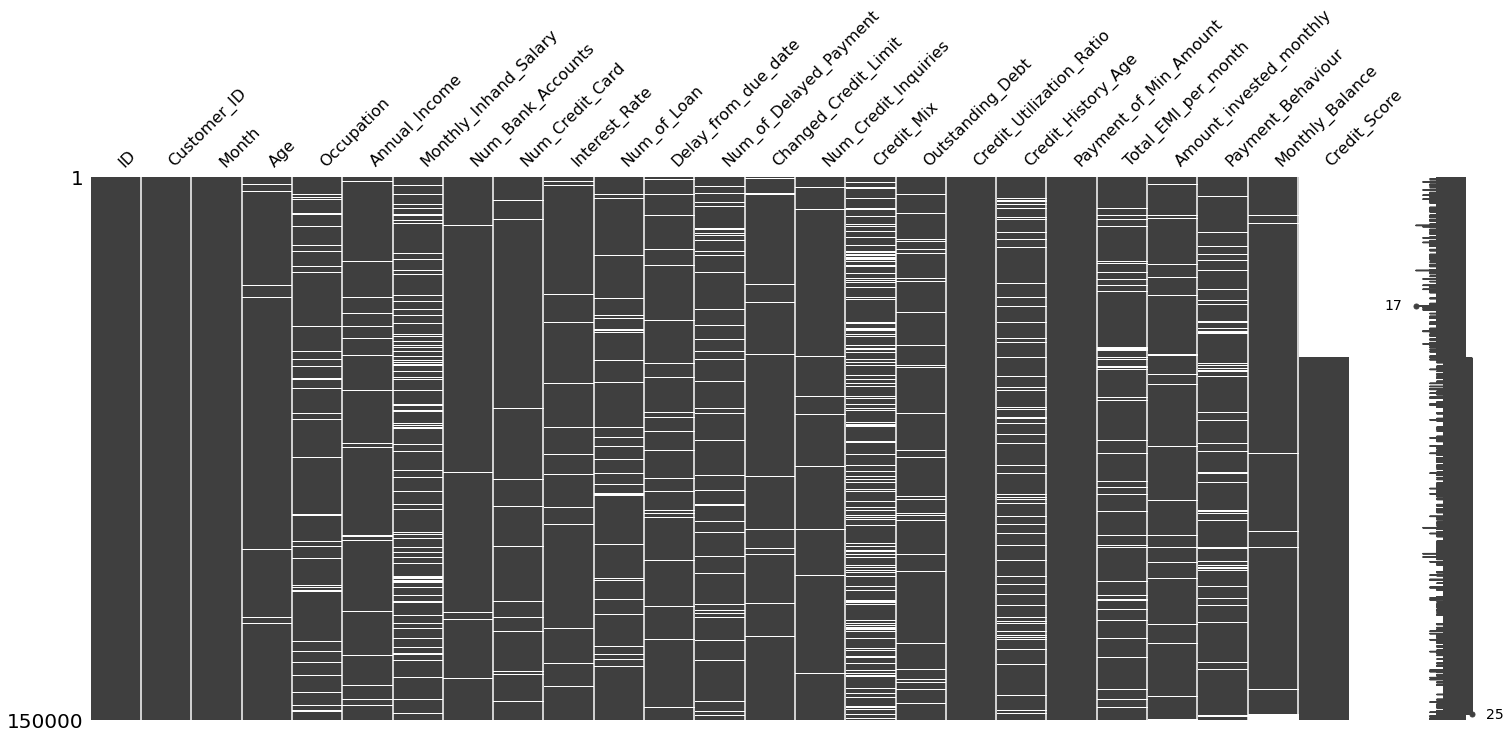

In [244]:
msno.matrix(df)


In [245]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing

Age                          4184
Occupation                  10500
Annual_Income                4165
Monthly_Inhand_Salary       22500
Num_Bank_Accounts            1950
Num_Credit_Card              3450
Interest_Rate                3000
Num_of_Loan                  6580
Delay_from_due_date          5998
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt             7908
Credit_Utilization_Ratio        4
Credit_History_Age          13500
Total_EMI_per_month         10696
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              3430
Credit_Score                50000
dtype: int64

In [246]:
missing_cols = [col for col in missing.index]
missing_cols.append('Customer_ID')
missing_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score',
 'Customer_ID']

In [194]:
missing_cols_set = set(missing_cols)
missing_cols_set

{'Age',
 'Amount_invested_monthly',
 'Annual_Income',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Credit_Mix',
 'Customer_ID',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Num_of_Loan',
 'Occupation',
 'Outstanding_Debt',
 'Payment_Behaviour',
 'Total_EMI_per_month'}

In [247]:
# numerical cols with missing values
numerical_cols_set = {col for col in df.columns if (df[col].dtype=='int64') | (df[col].dtype=='float64')}
numerical_cols_missing = [col for col in numerical_cols_set.intersection(missing_cols_set)]
numerical_cols_missing.append('Customer_ID')

In [248]:
numerical_cols_missing

['Customer_ID']

In [249]:
df[numerical_cols_missing].head(50)


,Customer_ID
0,CUS_0xd40
1,CUS_0xd40
2,CUS_0xd40
3,CUS_0xd40
4,CUS_0x21b1
5,CUS_0x21b1
6,CUS_0x21b1
7,CUS_0x21b1
8,CUS_0x2dbc
9,CUS_0x2dbc


In [250]:
numerical_cols_missing.pop()


'Customer_ID'

In [251]:
based_customer_ID = [col for col in numerical_cols if df[col].head(8).nunique() == 1]
non_based_customer_ID = [col for col in numerical_cols if df[col].head(8).nunique() != 1]

In [252]:
based_customer_ID, non_based_customer_ID


(['Num_Credit_Card'],
 ['Age',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Interest_Rate',
  'Num_of_Loan',
  'Delay_from_due_date',
  'Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Num_Credit_Inquiries',
  'Outstanding_Debt',
  'Credit_Utilization_Ratio',
  'Credit_History_Age',
  'Total_EMI_per_month',
  'Amount_invested_monthly',
  'Monthly_Balance'])

In [253]:
df[based_customer_ID] = df.groupby(by=['Customer_ID'])[based_customer_ID].transform('median')
df[non_based_customer_ID] = df[non_based_customer_ID].fillna(method='bfill')

In [254]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing

Occupation           10500
Credit_Mix           30000
Payment_Behaviour    11400
Monthly_Balance       1696
Credit_Score         50000
dtype: int64

In [256]:
missing_cols_set = {col for col in missing.index}
categorical_cols_set = {col for col in df.columns if df[col].dtype == 'object'}
categorical_cols_set

{'Credit_Mix',
 'Credit_Score',
 'Customer_ID',
 'ID',
 'Month',
 'Occupation',
 'Payment_Behaviour',
 'Payment_of_Min_Amount'}

In [257]:
categorical_cols_missing = [col for col in categorical_cols_set.intersection(missing_cols_set)]
categorical_cols_missing

['Credit_Mix', 'Payment_Behaviour', 'Occupation', 'Credit_Score']

In [258]:
df[categorical_cols_missing] = df[categorical_cols_missing].fillna(method='bfill')

ID                             0
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              1
Monthly_Balance             1696
Credit_Score                   0
dtype: int64

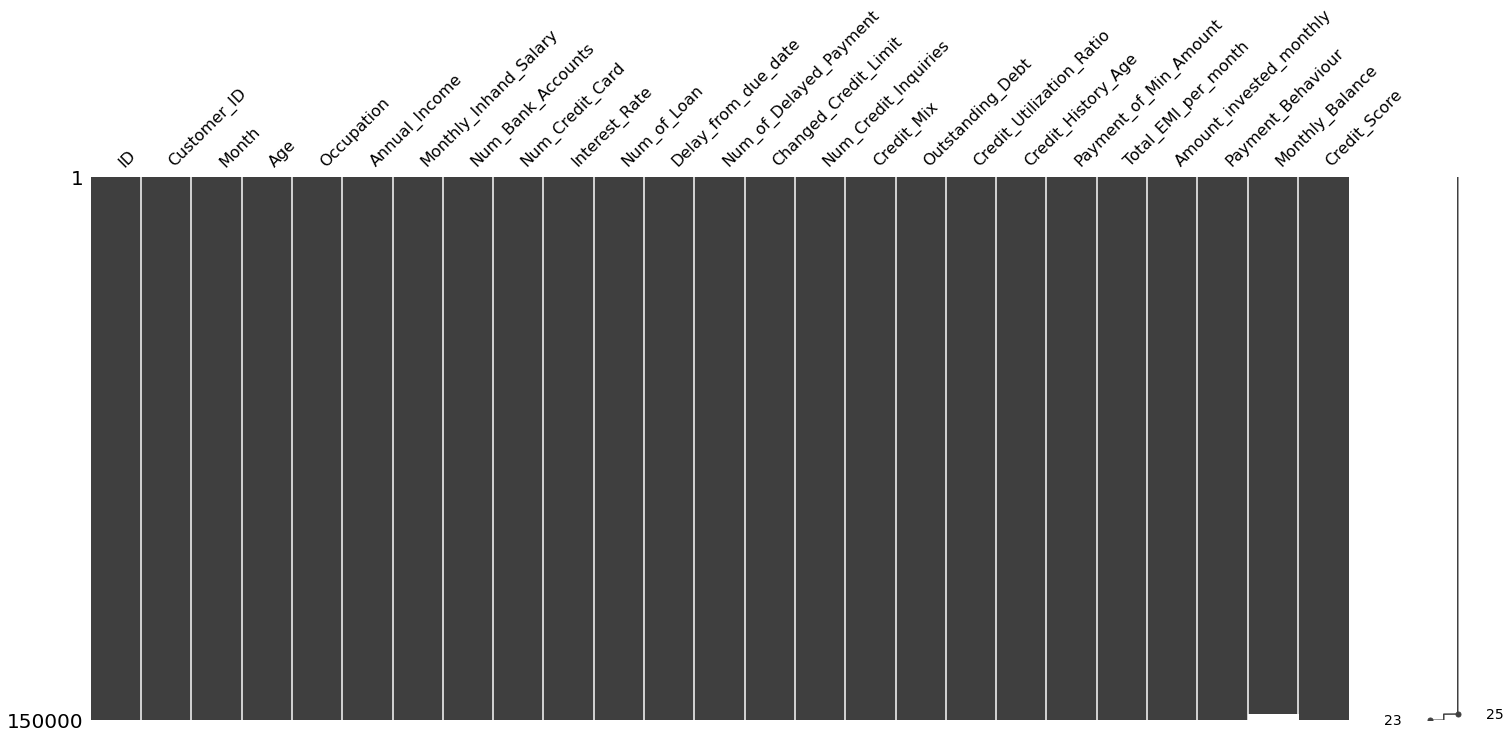

In [259]:
msno.matrix(df)
df.isna().sum()

In [260]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [261]:
df = df.copy()

In [262]:
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [370]:
df['Credit_Score']=df['Credit_Score'].map({'Poor':0,'Standard':1,'Good':2})
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].median())
df['Credit_Score'].shape

(150000,)

In [371]:
df['Credit_Score']=df['Credit_Score'].map({'Poor':0,'Good':1})
df['Credit_Score']=np.zeros(150000)

In [372]:
df['Credit_Score'].unique()

array([0.])

In [373]:
# summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,127500.0,4190.115139,3180.489657,303.645417,1625.265833,3091.000000,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,17.006940,117.069476,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,150000.0,22.623447,129.143006,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,150000.0,71.234907,461.537193,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,150000.0,21.063400,14.860154,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,147000.0,28.529014,194.456058,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,150000.0,32.283309,5.113315,20.000000,28.054731,32.297058,36.487954,50.000000
Total_EMI_per_month,150000.0,1432.513579,8403.759977,0.000000,30.947775,71.280006,166.279555,82398.000000
Credit_Score,150000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [352]:
y = df['Credit_Score']
X = df.drop(columns=['Credit_Score'], axis=1)

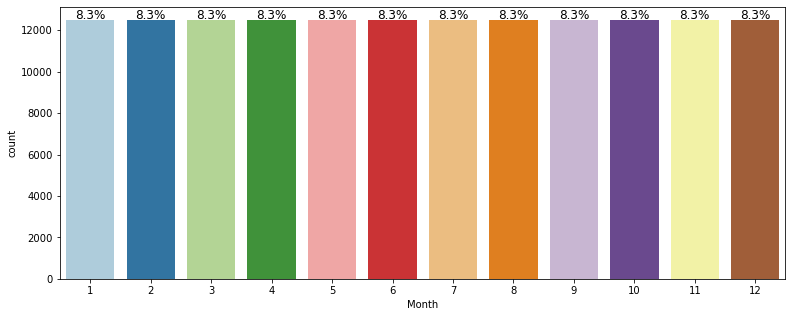

In [268]:
# use label_barplot function to plot the graph
labeled_barplot(X,"Month",True,False) 

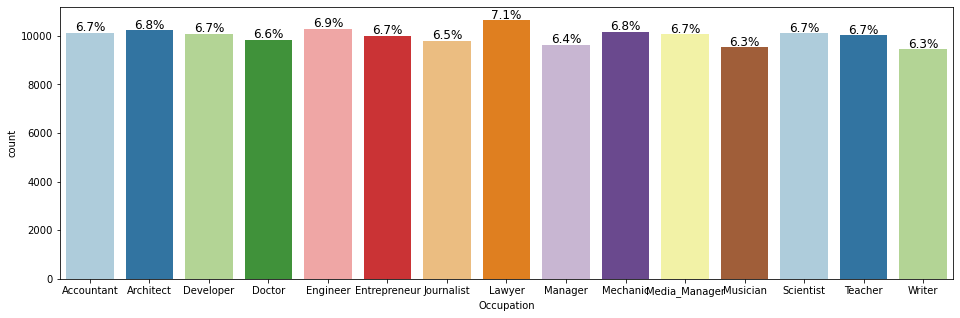

In [269]:
# use label_barplot function to plot the graph
labeled_barplot(X,"Occupation",True,False) 

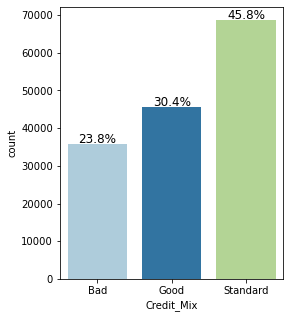

In [270]:
# use label_barplot function to plot the graph
labeled_barplot(X,"Credit_Mix",True,False) 

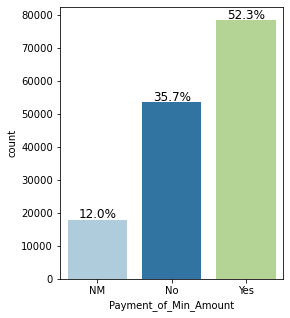

In [271]:
# use label_barplot function to plot the graph
labeled_barplot(X,"Payment_of_Min_Amount",True,False)

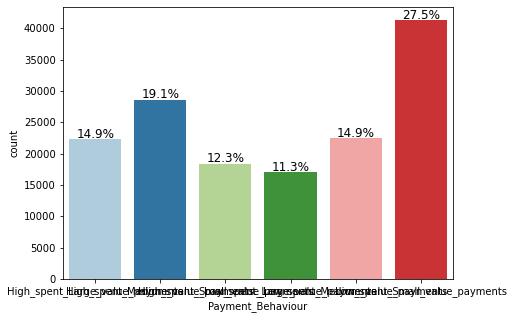

In [272]:
labeled_barplot(X,"Payment_Behaviour",True,False)

In [278]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['ID',
 'Customer_ID',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [279]:
low_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()<4)]
low_cardinality_categorical_cols

['Credit_Mix', 'Payment_of_Min_Amount']

In [280]:
high_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()>3)]

high_cardinality_categorical_cols

['ID', 'Customer_ID', 'Occupation', 'Payment_Behaviour']

In [281]:
OH_X = pd.get_dummies(X[low_cardinality_categorical_cols])
OH_X

,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,0,1,0,0,1,0
3,0,1,0,0,1,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
99995,0,1,0,0,1,0
99996,0,1,0,0,1,0
99997,0,1,0,0,1,0
99998,0,1,0,0,1,0


In [288]:
# Numerical Cols
numerical_cols = [col for col in X.columns if 
                 (X[col].dtype == 'float64')|
                 (X[col].dtype == 'int64')]

In [289]:
X[numerical_cols].head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,9,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,2022.0,809.98,35.030402,22.0,49.574949,236.642682,186.266702
1,10,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,4.0,809.98,33.053114,22.0,49.574949,21.465380,361.444004
2,11,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,12.27,4.0,809.98,33.811894,23.0,49.574949,148.233938,264.675446
3,12,24.0,19114.12,3037.986667,3.0,4.0,3.0,4.0,4.0,5.0,11.27,4.0,809.98,32.430559,23.0,49.574949,39.082511,343.826873
4,9,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,5.0,605.03,25.926822,27.0,18.816215,39.684018,485.298434


In [290]:
numerical_X = X[numerical_cols]


In [292]:
cols_for_scaled = ['Annual_Income', 
                   'Monthly_Inhand_Salary', 
                   'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 
                   'Credit_History_Age', 
                   'Total_EMI_per_month', 
                   'Amount_invested_monthly',
                   'Monthly_Balance']

scaler = MinMaxScaler()
numerical_scaled_X = pd.DataFrame(scaler.fit_transform(numerical_X[cols_for_scaled]), 
                                  index=numerical_X[cols_for_scaled].index, 
                                  columns=numerical_X[cols_for_scaled].columns)
numerical_X[cols_for_scaled] = numerical_scaled_X

In [375]:
numerical_X


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,9,23.0,0.083052,0.102087,3.0,4.0,3.0,4.0,3.0,7.0,11.27,2022.0,0.201725,0.517143,0.647059,0.134284,0.023664,1.0
1,10,24.0,0.083052,0.102087,3.0,4.0,3.0,4.0,3.0,9.0,13.27,4.0,0.201725,0.449112,0.647059,0.134284,0.002147,1.0
2,11,24.0,0.083052,0.102087,3.0,4.0,3.0,4.0,-1.0,4.0,12.27,4.0,0.201725,0.475219,0.676471,0.134284,0.014823,1.0
3,12,24.0,0.083052,0.183501,3.0,4.0,3.0,4.0,4.0,5.0,11.27,4.0,0.201725,0.427692,0.676471,0.134284,0.003908,1.0
4,9,28.0,0.190972,0.183501,2.0,4.0,6.0,1.0,3.0,1.0,5.42,5.0,0.150668,0.203921,0.794118,0.050968,0.003968,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,0.223766,0.205072,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,0.125096,0.504522,0.911765,0.095087,0.006097,NaN
99996,5,25.0,0.223766,0.205072,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,0.125096,0.707591,0.911765,0.095087,0.005419,NaN
99997,6,25.0,0.223766,0.205072,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,0.125096,0.731328,0.911765,0.095087,0.002403,NaN
99998,7,25.0,0.223766,0.205072,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,0.125096,0.469243,0.911765,0.095087,0.025167,NaN


In [376]:
Final_X = numerical_X.join(categorical_X)

In [377]:
Final_X.isna().sum()

Month                           0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Total_EMI_per_month             0
Amount_invested_monthly         0
Monthly_Balance              1696
Credit_Mix_Bad               1696
Credit_Mix_Good              1696
Credit_Mix_Standard          1696
Payment_of_Min_Amount_NM     1696
Payment_of_Min_Amount_No     1696
Payment_of_Min_Amount_Yes    1696
dtype: int64

In [378]:
df=pd.DataFrame(Final_X)

In [379]:
df['Monthly_Balance']=df['Monthly_Balance'].fillna(df['Monthly_Balance'].mode()[0])
df['Credit_Mix_Bad']=df['Credit_Mix_Bad'].fillna(df['Credit_Mix_Bad'].mode()[0])
df['Credit_Mix_Good']=df['Credit_Mix_Good'].fillna(df['Credit_Mix_Good'].mode()[0])
df['Credit_Mix_Standard']=df['Credit_Mix_Standard'].fillna(df['Credit_Mix_Standard'].mode()[0])
df['Payment_of_Min_Amount_NM']=df['Payment_of_Min_Amount_NM'].fillna(df['Payment_of_Min_Amount_NM'].mode()[0])
df['Payment_of_Min_Amount_No']=df['Payment_of_Min_Amount_No'].fillna(df['Payment_of_Min_Amount_No'].mode()[0])
df['Payment_of_Min_Amount_Yes']=df['Payment_of_Min_Amount_Yes'].fillna(df['Payment_of_Min_Amount_Yes'].mode()[0])

In [390]:
X.drop(columns=['ID','Customer_ID','Month','Name','Age','SSN','Occupation'],inplace=True)

In [391]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: Credit_Score, Length: 150000, dtype: float64

In [330]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [331]:
scaler.fit_transform(X)

array([[ 0.72420682, -0.97335239, -0.83211292, ...,  0.46447317,
        -0.49970863, -0.19683357],
       [ 1.01388955, -0.88048589, -0.83211292, ...,  0.46447317,
        -0.49970863, -0.30184692],
       [ 1.30357228, -0.88048589, -0.83211292, ...,  0.58479427,
        -0.49970863, -0.23997984],
       ...,
       [-0.14484136, -0.78761939, -0.24906046, ...,  1.54736314,
        -0.66982551, -0.30059605],
       [ 0.14484136, -0.78761939, -0.24906046, ...,  1.54736314,
        -0.66982551, -0.1894985 ],
       [ 0.43452409, -0.78761939, -0.24906046, ...,  1.54736314,
        -0.66982551, -0.23074143]])

In [392]:
# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25)

# creating a list of column names
feature_names = X_train.columns.to_list()
feature_names

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly']

In [397]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

ValueError: could not convert string to float: '64734.84_'

In [398]:
test_data=pd.read_csv("C:\\Users\\HPr\\Downloads\\archive (6)\\train.csv")

In [399]:
y = test_data['Credit_Score']
X = test_data.drop(columns=['Credit_Score'], axis=1)

In [400]:
X

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979
